## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/introduction-to-yellowbrick-a-python-library-to-explain-the-prediction-of-your-machine-learning-d63ecee10ecc)) <font size='3ptx'>**You increased your f1-score to 98%! But does that mean your model is performing better?**</font>

Congratulation! You have just trained a model and improved your f1-score to 98%! But what does it really mean? Will the increase in the f1 score indicate that your model is performing better? You know f1-score is the harmonic between recall and precision, but how many of them are false among the positive predictions? And how many of them are false among the negative predictions?

If you want to hypertune your machine learning model to improve the f1-score to 99%, which category should you focus on improving to have an increase of 1%?

**Gaining these insights would help you to understand your machine learning results and know which action you should take to improve the model.** One of the best ways to understand machine learning is through plots. That is when [**Yellowbrick**](https://www.scikit-yb.org/en/latest/) becomes helpful.

## <font color='darkblue'>What is Yellowbrick?</font>
[**Yellowbrick**](https://www.scikit-yb.org/en/latest/) is a machine learning visualization libary. Essentially, Yellowbrick makes it easier for you to:
* Select features
* Tuning hyperparameters
* Interpret the score of your models
* Visualize text data

Being able to analyze your data and model with plots would make it much easier for you to understand your model and figure out the next steps to increase the scores that are meaningful to your goal.

**In this article, we will play with a classification problem to learn which tools yellowbrick provides that can help you interpret your classification results.** To install Yellowbrick, type:

In [1]:
# !pip install yellowbrick

We will use occupancy, the experimental data used for binary classification (room occupancy) from Temperature, Humidity, Light, and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

In [2]:
from yellowbrick.datasets.loaders import load_occupancy
import warnings
warnings.filterwarnings('ignore')

X, y = load_occupancy()
X.head()

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,temperature,relative humidity,light,CO2,humidity
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [3]:
from collections import Counter
Counter(y.tolist())

Counter({1: 4750, 0: 15810})

## <font color='darkblue'>Visualize the Data</font>

### <font color='darkgreen'>Rank Features</font>
How correlated are for each pair of features in the data? A two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time. We use [**Pearson correlation**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) to score to detect colinear relationships.

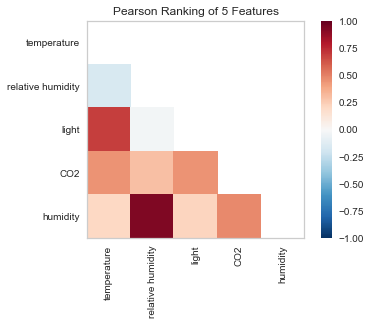

In [4]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           
visualizer.transform(X)        
visualizer.show()

Based on the data, `humidity` is strongly correlated to the `relative humidity`. `Light` is strongly correlated to the `temperature`. This makes sense since these features often come hand in hand with each other.

### <font color='darkgreen'>Class Balance</font>
**One of the biggest challenges for classification models is the imbalance of classes in training data**. Our high f1-score might be not a good evaluation score for an imbalanced class because the classifier can simply guess all the majority class to get a high score.

Thus, it is important to visualize the distribution of the class. We could utilize [**ClassBalance**](https://www.scikit-yb.org/en/latest/api/target/class_balance.html#yellowbrick.target.class_balance.ClassBalance) to visualize the distribution of the class with a bar chart

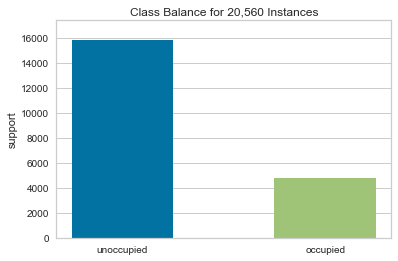

In [5]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It seems like there are a lot more data classified as unoccupied than occupied. Knowing this, we **can utilize several techniques for dealing with class imbalance such as <font color='darkblue'>stratified sampling</font>, <font color='darkblue'>weighting</font> to get a more informative result.**

## <font color='darkblue'>Visualize the Results of the Model</font>
Now we come back to the question: What does the f1-score of 98% really mean? Does the increase in f1-score result in more profit for your company?

Yellowbrick provides several tools you can use to visualize the results for classification problems. Some of them you might have or have not heard of, that can be extremely helpful for interpreting your model.

### <font color='darkgreen'>Confusion Matrix</font>
What is the percentage of false predictions among the unoccupied class? What is the percentage of false predictions among the occupied class? The [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix) helps us to answer this question:

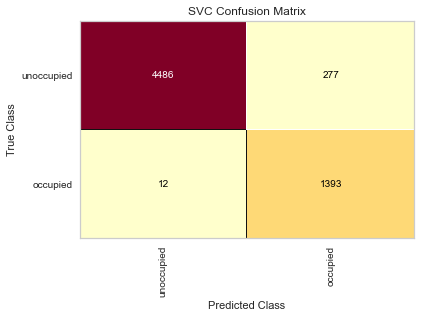

In [6]:
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(gamma='auto')
classes = ["unoccupied", "occupied"]
cm = ConfusionMatrix(model, classes=classes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

It seems like the `unoccupied class` is with a higher percentage of wrong predictions (<font color='brown'>277 unoccupied being classified as occupied</font>); thus, we could try to improve the number of the right predictions in the `unoccupied class` to improve the score.

### <font color='darkgreen'>ROC/AUC</font>
Imagine we improve our f1 score to 99%, how do we know that it is actually better? Confusion matrix could help but instead of comparing the percentage of right prediction in each class between two models, **is there an easier way to compare to the performance of two models? That is when [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and AUC would be helpful.**

**A ROC/AUC plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity**. A ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis.

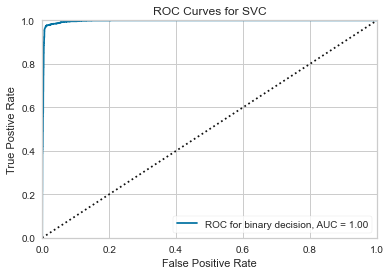

In [7]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, micro=False, macro=False, per_class=False)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one. **The higher the area under the curve** (<font color='brown'>AUC</font>), **the better the model generally is.**

Considering that our ROC curves are near the top-left corner, the performance of our model is really good. If we observe that a different model or a different hyperparameter result in ROC curves are closer to the top left corner then our current one, we can assure that the performance of our model actually improves.

## <font color='darkblue'>How do we improve the model?</font>
Now we understand the performance of our model, how do we go about improving the model? To improve our model, we might want to:
* Prevent our model from underfitting or overfitting
* Find the features are the most important to the estimator

We will explore the tools provided by [**Yellowbrick**](https://www.scikit-yb.org/en/latest/) to help us figure out how to improve our model

### <font color='darkgreen'>Validation Curve</font>
A model can have many hyperparameters. We might select the hyperparameters that accurately predict the training data. **The good way to find the best hyperparameters is to choose a combination of those parameters with a grid search**.

But how do we know that those hyperparameters will also accurately predict the test data? It is useful to plot the influence of a single hyperparameter on the training and test data to determine if the estimator is underfitting or overfitting for some hyperparameter values.

**<font color='darkblue'>Validation Curve</font> ([details](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html?highlight=ValidationCurve#validation-curve)) could help us to find the sweet spot where lower or higher value than this hyperparameter will result in underfitting or overfitting the data**:

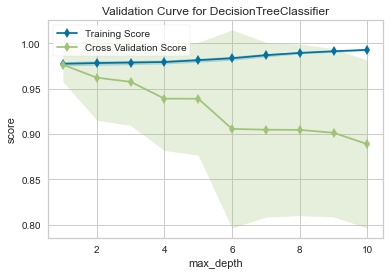

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import validation_curve

model = DecisionTreeClassifier()
viz = validation_curve(
    model, X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

As we can see from the plot, while the higher number of <font color='violet'>max_depth</font> results in the higher training score, but it also results in the lower cross-validation score. **This makes sense since decision trees become more overfitting the deeper they are.**

Thus, the sweet spot will be where the cross-validation score does not decrease, which is 1.

### <font color='darkgreen'>Learning Curve</font>
Will more data result in a better performance of the model? Not always, the estimator may be more sensitive to error due to variance. That is when the [**learning curve**](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html) is helpful. **A [learning curve](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html) shows the relationship of the training score versus the cross-validated test score for an estimator with a varying number of training samples**.

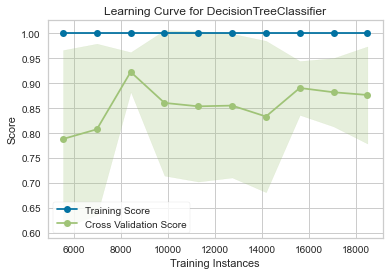

In [11]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    model, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

From the graph, we can see that **the number of training instances of around 8700 results in the best f1-score**. The higher number of training instances results in a lower f1-score.

### <font color='darkgreen'>Feature Importances</font>
Having more features is not always equivalent to a better model. **The more features the model has, the more sensitive the model is to errors due to variance. Thus, we want to select the minimum required features to produce a valid model.**

A common approach to eliminate features is to eliminate the ones that are the least important to the model. Then we re-evaluate if the model actually performs better during cross-validation.

[**Feature importance**](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) is perfect for this task since it helps us to visualize the relative importance of the features for the model.

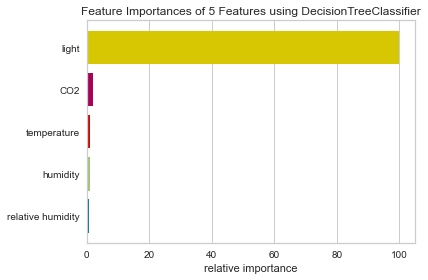

In [12]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

It seems like the `light` is the most important feature to [**DecisionTreeClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), followed by `CO2`, `temperature`.

Considering there are not many features in our data, we will not eliminate humidity. But if there are many features in our model, we should eliminate the ones that are not important to the model to prevent errors due to variance.